# Tech Gadget consumption data analysis (worldwide).
 This project analyzes buying and adoption tendencies of tech products across various countries.

In [1]:
#library imports.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
##data import and data cleaning.

file_path = "Global_Tech_Gadget_Consumption.csv"
data = pd.read_csv(file_path)

data = data.dropna()

#convert columns into appropiate data types.
numeric_columns = [
    "Smartphone Sales (Millions)", "Laptop Shipments (Millions)",
    "Gaming Console Adoption (%)", "Smartwatch Penetration (%)",
    "Average Consumer Spending on Gadgets ($)", "E-Waste Generated (Metric Tons)",
    "5G Penetration Rate (%)"
]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

#verify clean data.
data.head()

,Country,Year,Smartphone Sales (Millions),Laptop Shipments (Millions),Gaming Console Adoption (%),Smartwatch Penetration (%),Average Consumer Spending on Gadgets ($),E-Waste Generated (Metric Tons),5G Penetration Rate (%)
0,USA,2015,111.37,123.63,12.05,14.49,311.21,939.89,54.64
1,USA,2016,224.65,65.27,12.92,9.88,250.46,1361.42,53.61
2,USA,2017,102.12,26.75,19.63,17.35,2404.22,872.52,29.94
3,USA,2018,148.10,129.28,26.44,12.45,1883.37,1241.41,75.88
4,USA,2019,83.93,97.81,20.84,6.18,777.42,1939.39,76.26


In [3]:
#statistical analysis.
stats = data.describe()
stats

numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlations = numeric_data.corr()
correlations

,Year,Smartphone Sales (Millions),Laptop Shipments (Millions),Gaming Console Adoption (%),Smartwatch Penetration (%),Average Consumer Spending on Gadgets ($),E-Waste Generated (Metric Tons),5G Penetration Rate (%)
Year,1.000000,-0.099255,0.025905,0.049337,0.089091,0.151852,-0.033040,-0.103602
Smartphone Sales (Millions),-0.099255,1.000000,0.000544,0.212785,-0.089332,0.057468,-0.058065,-0.036275
Laptop Shipments (Millions),0.025905,0.000544,1.000000,0.123847,-0.142155,0.035635,-0.005528,-0.059306
Gaming Console Adoption (%),0.049337,0.212785,0.123847,1.000000,-0.137411,0.121863,-0.036693,0.021808
Smartwatch Penetration (%),0.089091,-0.089332,-0.142155,-0.137411,1.000000,-0.107493,-0.047686,-0.072297
Average Consumer Spending on Gadgets ($),0.151852,0.057468,0.035635,0.121863,-0.107493,1.000000,0.074597,0.035368
E-Waste Generated (Metric Tons),-0.033040,-0.058065,-0.005528,-0.036693,-0.047686,0.074597,1.000000,0.063681
5G Penetration Rate (%),-0.103602,-0.036275,-0.059306,0.021808,-0.072297,0.035368,0.063681,1.000000


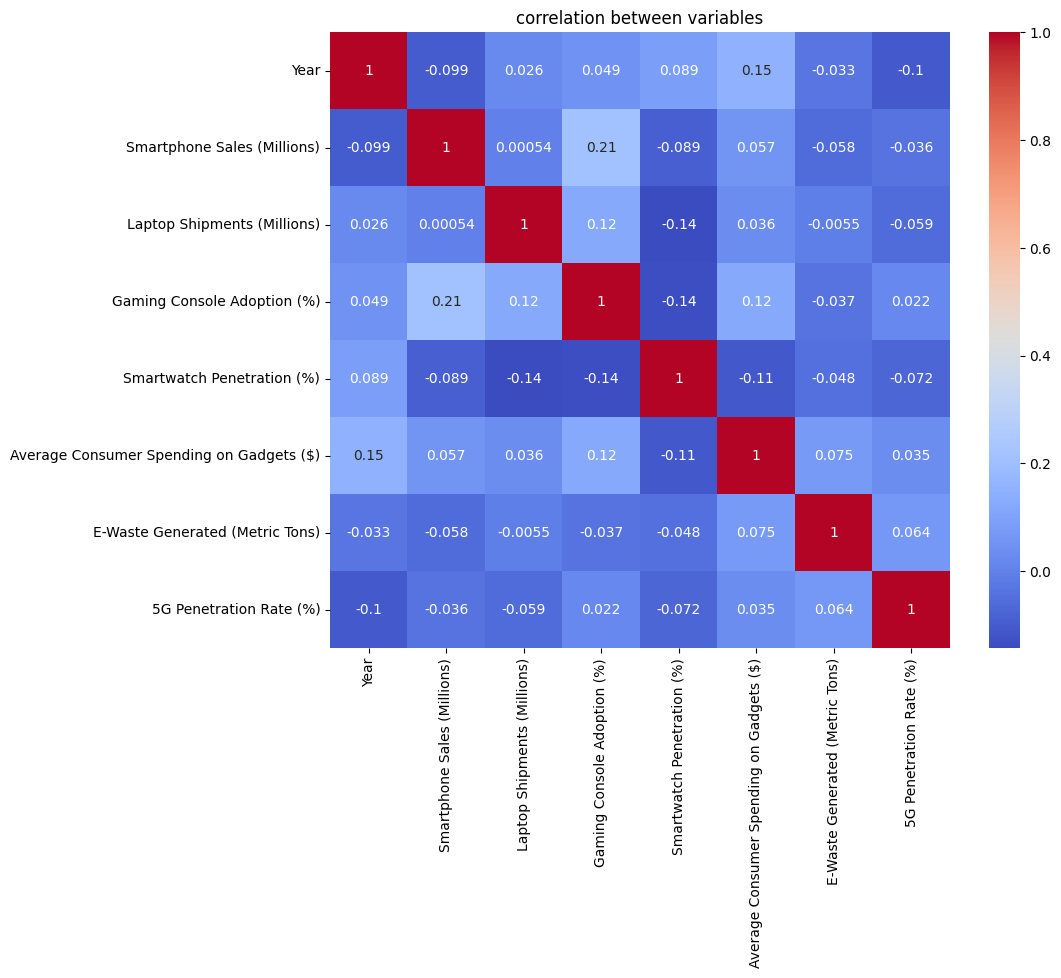

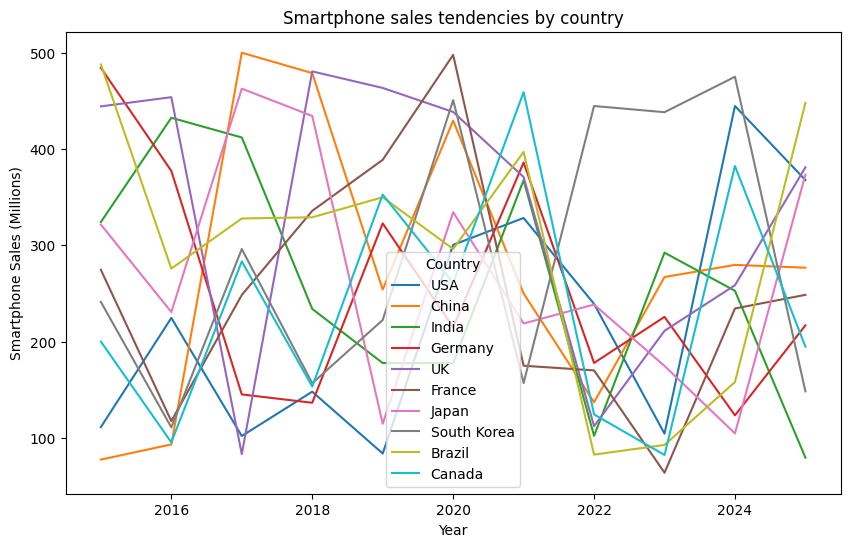

In [4]:
#data visualization.
#correlation heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(correlations, annot = True, cmap = 'coolwarm')
plt.title('correlation between variables')
plt.show()

#tendencies between smartphone sales by country.
plt.figure(figsize = (10,6))
sns.lineplot(data = data, x='Year',y = 'Smartphone Sales (Millions)', hue = 'Country')
plt.title("Smartphone sales tendencies by country")
plt.show()

Mean Squared Error: 1003.0571413349207


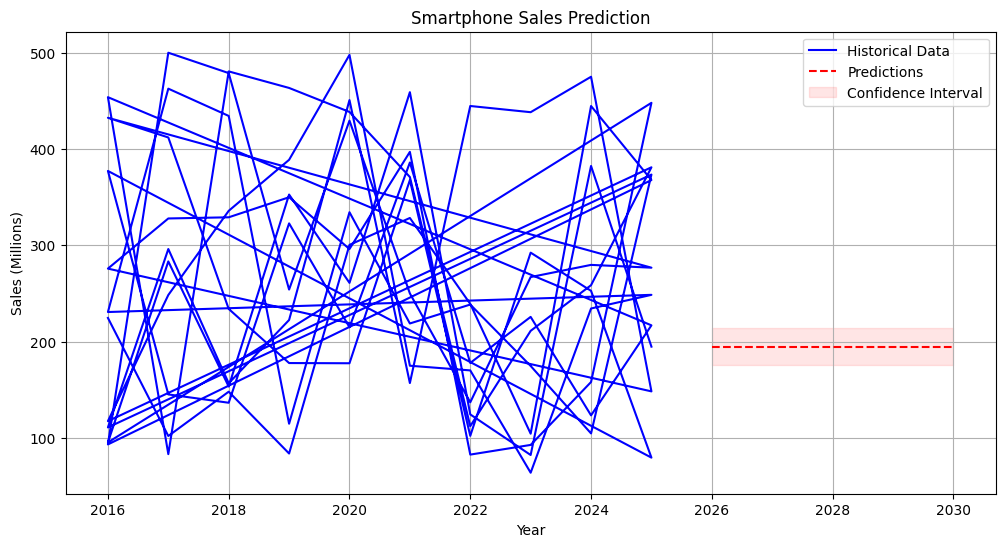


Predictions for future years:
Year 2026: 194.80 million smartphones
    Confidence Interval: [175.32, 214.28]
Year 2027: 194.80 million smartphones
    Confidence Interval: [175.32, 214.28]
Year 2028: 194.80 million smartphones
    Confidence Interval: [175.32, 214.28]
Year 2029: 194.80 million smartphones
    Confidence Interval: [175.32, 214.28]
Year 2030: 194.80 million smartphones
    Confidence Interval: [175.32, 214.28]


In [5]:
#future sales predictions.
# Prepare features
df = data.copy()
df['Year_Squared'] = df['Year'] ** 2
df['Previous_Year_Sales'] = df.groupby('Country')['Smartphone Sales (Millions)'].shift(1)
df['Sales_Growth'] = df.groupby('Country')['Smartphone Sales (Millions)'].pct_change()
df = df.dropna()  # Remove NaN values created by shifting

# Select features
features = ['Year', 'Year_Squared', 'Previous_Year_Sales', 'Sales_Growth']
X = df[features]
y = df['Smartphone Sales (Millions)']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Prepare future predictions
last_year = df['Year'].max()
future_years = pd.DataFrame({
    'Year': range(last_year + 1, last_year + 6),
    'Year_Squared': [year ** 2 for year in range(last_year + 1, last_year + 6)]
})
future_years['Previous_Year_Sales'] = y.iloc[-1]
future_years['Sales_Growth'] = 0

# Scale future features
future_scaled = scaler.transform(future_years[features])

# Make predictions
future_predictions = model.predict(future_scaled)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Smartphone Sales (Millions)'], 'b-', label='Historical Data')
plt.plot(future_years['Year'], future_predictions, 'r--', label='Predictions')
plt.fill_between(
    future_years['Year'],
    future_predictions * 0.9,  # Lower bound
    future_predictions * 1.1,  # Upper bound
    color='r', alpha=0.1,
    label='Confidence Interval'
)
plt.title('Smartphone Sales Prediction')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.grid(True)
plt.show()

# Print predictions with confidence intervals
print("\nPredictions for future years:")
for year, pred in zip(future_years['Year'], future_predictions):
    print(f"Year {year}: {pred:.2f} million smartphones")
    print(f"    Confidence Interval: [{pred*0.9:.2f}, {pred*1.1:.2f}]")

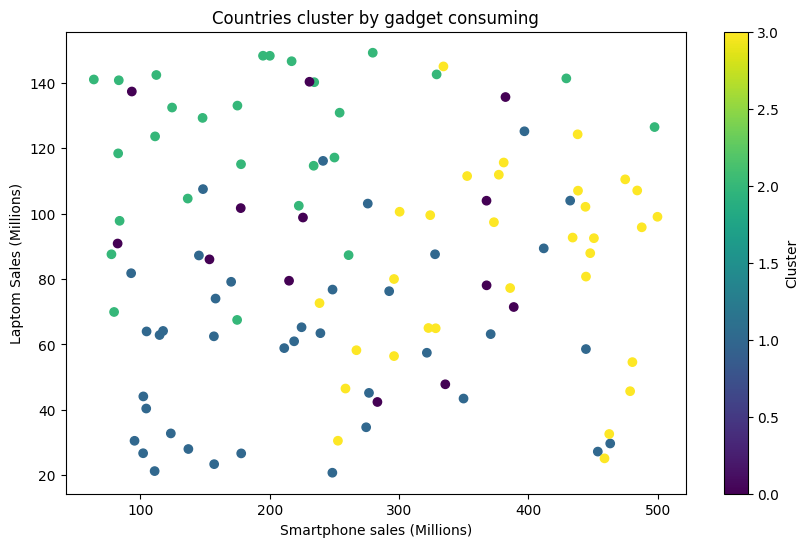

In [6]:
#Countries clustering.
features = [
    "Smartphone Sales (Millions)", "Laptop Shipments (Millions)",
    "Gaming Console Adoption (%)", "Smartwatch Penetration (%)",
    "Average Consumer Spending on Gadgets ($)", "E-Waste Generated (Metric Tons)"
]
X = data[features]

# Normalize data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means.
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters.
plt.figure(figsize=(10, 6))
plt.scatter(data['Smartphone Sales (Millions)'], data['Laptop Shipments (Millions)'], c=data['Cluster'], cmap='viridis')
plt.title("Countries cluster by gadget consuming")
plt.xlabel("Smartphone sales (Millions)")
plt.ylabel("Laptom Sales (Millions)")
plt.colorbar(label="Cluster")
plt.show()

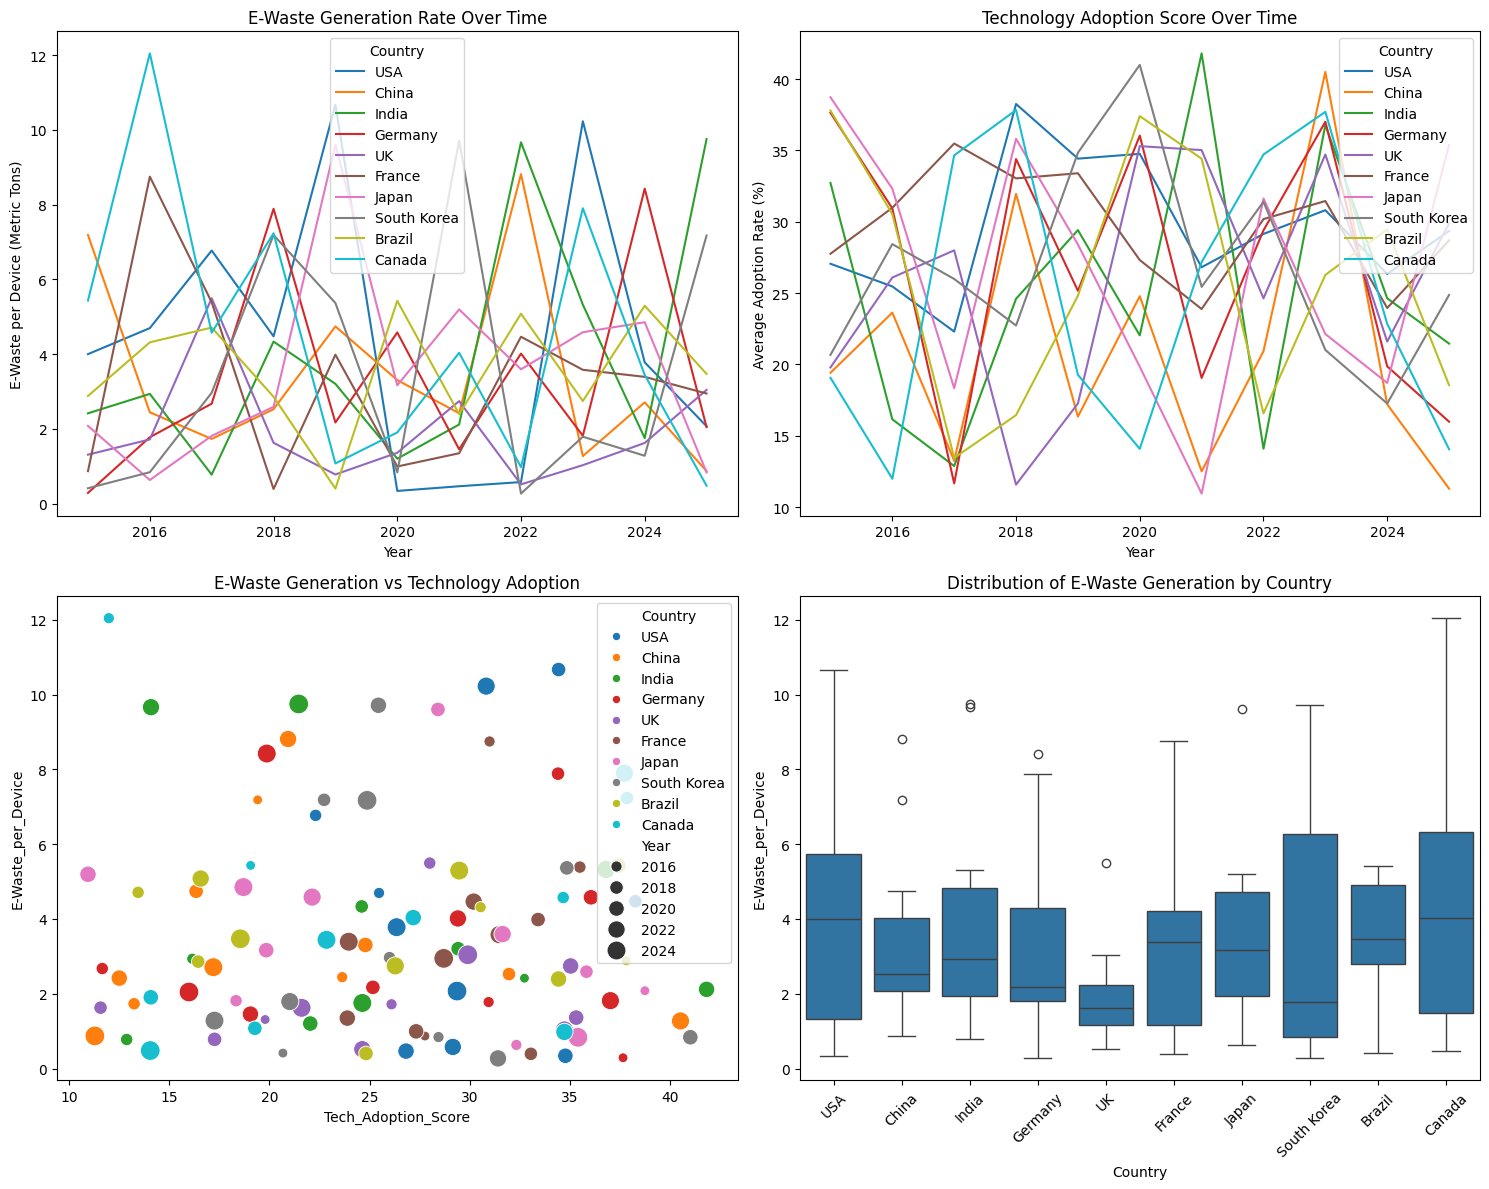

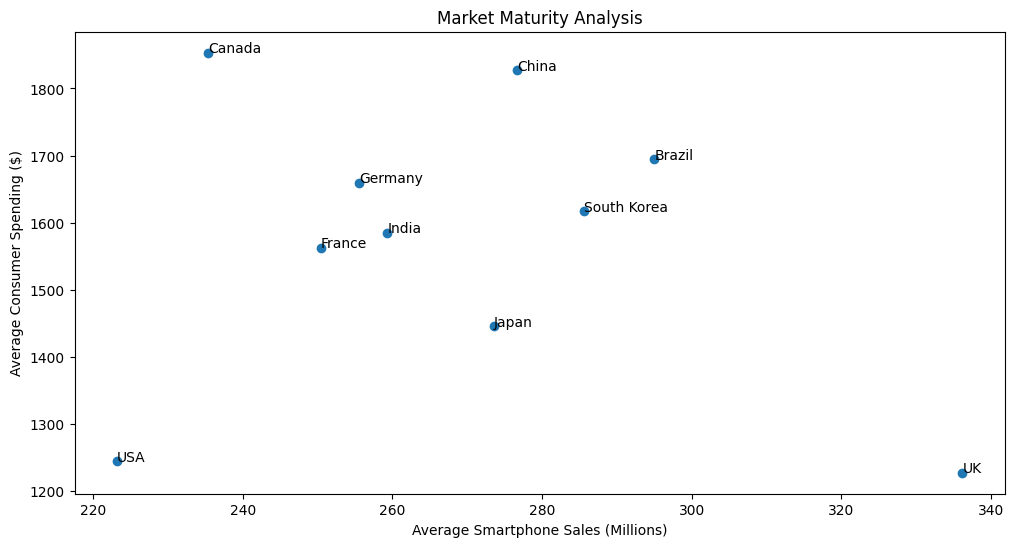

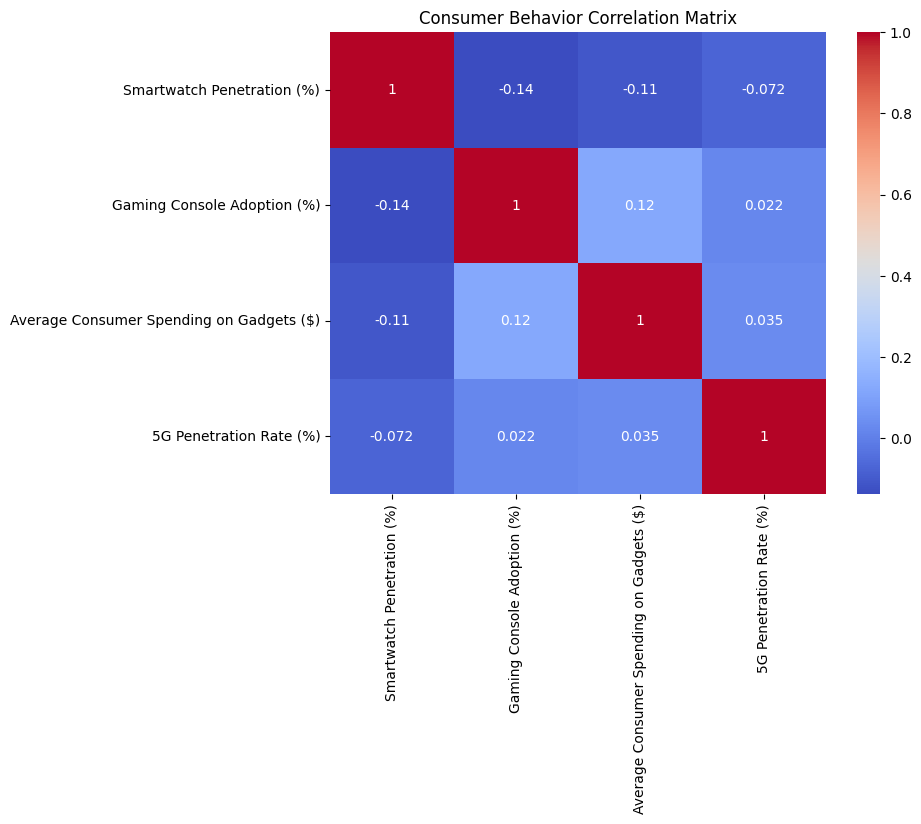

In [7]:
#Additional analysis for deep insights.

# Calculate key metrics
data['E-Waste_per_Device'] = data['E-Waste Generated (Metric Tons)'] / (data['Smartphone Sales (Millions)'] + data['Laptop Shipments (Millions)'])
data['Tech_Adoption_Score'] = (data['5G Penetration Rate (%)'] + 
                              data['Smartwatch Penetration (%)'] + 
                              data['Gaming Console Adoption (%)']) / 3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. E-Waste per Device Time Series
sns.lineplot(data=data, x='Year', y='E-Waste_per_Device', hue='Country', ax=ax1)
ax1.set_title('E-Waste Generation Rate Over Time')
ax1.set_ylabel('E-Waste per Device (Metric Tons)')

# 2. Technology Adoption Score Time Series
sns.lineplot(data=data, x='Year', y='Tech_Adoption_Score', hue='Country', ax=ax2)
ax2.set_title('Technology Adoption Score Over Time')
ax2.set_ylabel('Average Adoption Rate (%)')

# 3. E-Waste vs Tech Adoption Scatter Plot
sns.scatterplot(data=data, x='Tech_Adoption_Score', y='E-Waste_per_Device', 
               hue='Country', size='Year', sizes=(50, 200), ax=ax3)
ax3.set_title('E-Waste Generation vs Technology Adoption')

# 4. Box Plot of E-Waste per Device by Country
sns.boxplot(data=data, x='Country', y='E-Waste_per_Device', ax=ax4)
ax4.set_title('Distribution of E-Waste Generation by Country')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Market Maturity Analysis
pivot_sales = pd.pivot_table(data, 
                           values=['Smartphone Sales (Millions)', 'Average Consumer Spending on Gadgets ($)'],
                           index='Country',
                           aggfunc='mean')

# 4. Correlation Matrix for Consumer Behavior
behavior_cols = ['Smartwatch Penetration (%)', 'Gaming Console Adoption (%)', 
                'Average Consumer Spending on Gadgets ($)', '5G Penetration Rate (%)']
behavior_corr = data[behavior_cols].corr()

# Visualize Market Maturity
plt.figure(figsize=(12, 6))
plt.scatter(pivot_sales['Smartphone Sales (Millions)'], 
           pivot_sales['Average Consumer Spending on Gadgets ($)'])
plt.xlabel('Average Smartphone Sales (Millions)')
plt.ylabel('Average Consumer Spending ($)')
plt.title('Market Maturity Analysis')
for idx, row in pivot_sales.iterrows():
    plt.annotate(idx, (row['Smartphone Sales (Millions)'], 
                      row['Average Consumer Spending on Gadgets ($)']))
plt.show()

# Visualize Consumer Behavior Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(behavior_corr, annot=True, cmap='coolwarm')
plt.title('Consumer Behavior Correlation Matrix')
plt.show()

## Conclusions:
- Smartphone sales have shown variable tendencies depending on the country.
- There is a significant correlation between spendings in gadgets and 5G penetration.
- E-waste generation is strongly related to gadget consumption.
- The E-Waste per Device metric shows how efficiently countries manage their electronic waste relative to device sales
- The Technology Adoption Score provides a unified view of how quickly countries adopt new technologies
- The scatter plot reveals any correlation between technology adoption and e-waste generation
- The box plots show the distribution and variability of e-waste generation across countries